CLIP3
1. ให้ศึกษาค้นคว้า การ CROP
2. ให้สร้าง crop.json เพื่อตัดวส่วนหนึ่งของถนน (manually)

In [1]:
import open3d as o3d
print(o3d.__version__)
import numpy as np
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import json

0.18.0


In [2]:
path_iphone7_ply = "Dataset/iphone7.ply"
# path_kota_circuit2_ply = "Dataset/kota_circuit2.ply"

In [3]:
print("Load a ply point cloud, print it, and render it")
pcd_iphone7 = o3d.io.read_point_cloud(path_iphone7_ply)
print("iphone7:\n",pcd_iphone7)

Load a ply point cloud, print it, and render it
iphone7:
 PointCloud with 8076963 points.


### [open3d_file_io](https://www.open3d.org/docs/release/tutorial/geometry/file_io.html)
### [pointclouds_document](http://pointclouds.org/documentation/tutorials/pcd_file_format.html)

In [4]:
'''
points np
'''
points_iphone7 = np.asarray(pcd_iphone7.points)
# points_kota_circuit2 = np.asarray(pcd_kota_circuit2.points)
print("iphone7:\n",points_iphone7)
# print("kota_circuit2:\n",points_kota_circuit2)

iphone7:
 [[-1033.32434082  1316.9284668  -1062.46020508]
 [-1022.46795654  1315.88684082 -1062.16821289]
 [-1011.65161133  1314.84265137 -1061.86083984]
 ...
 [15163.73046875  4870.33691406  -860.22692871]
 [15154.33007812  4861.89550781  -859.56201172]
 [15145.42675781  4854.18017578  -859.59936523]]


In [5]:
x_points = points_iphone7[:,0]
y_points = points_iphone7[:,1]
z_points = points_iphone7[:,2]
print(x_points)
print(y_points)
print(z_points)

[-1033.32434082 -1022.46795654 -1011.65161133 ... 15163.73046875
 15154.33007812 15145.42675781]
[1316.9284668  1315.88684082 1314.84265137 ... 4870.33691406 4861.89550781
 4854.18017578]
[-1062.46020508 -1062.16821289 -1061.86083984 ...  -860.22692871
  -859.56201172  -859.59936523]


In [6]:
'''
colors np
'''
colors = np.asarray(pcd_iphone7.colors)
print(colors)

[[0.18431373 0.18431373 0.17647059]
 [0.11764706 0.12156863 0.10196078]
 [0.23137255 0.22352941 0.21176471]
 ...
 [0.64705882 0.63137255 0.58039216]
 [0.6        0.57647059 0.53333333]
 [0.59607843 0.58823529 0.54509804]]


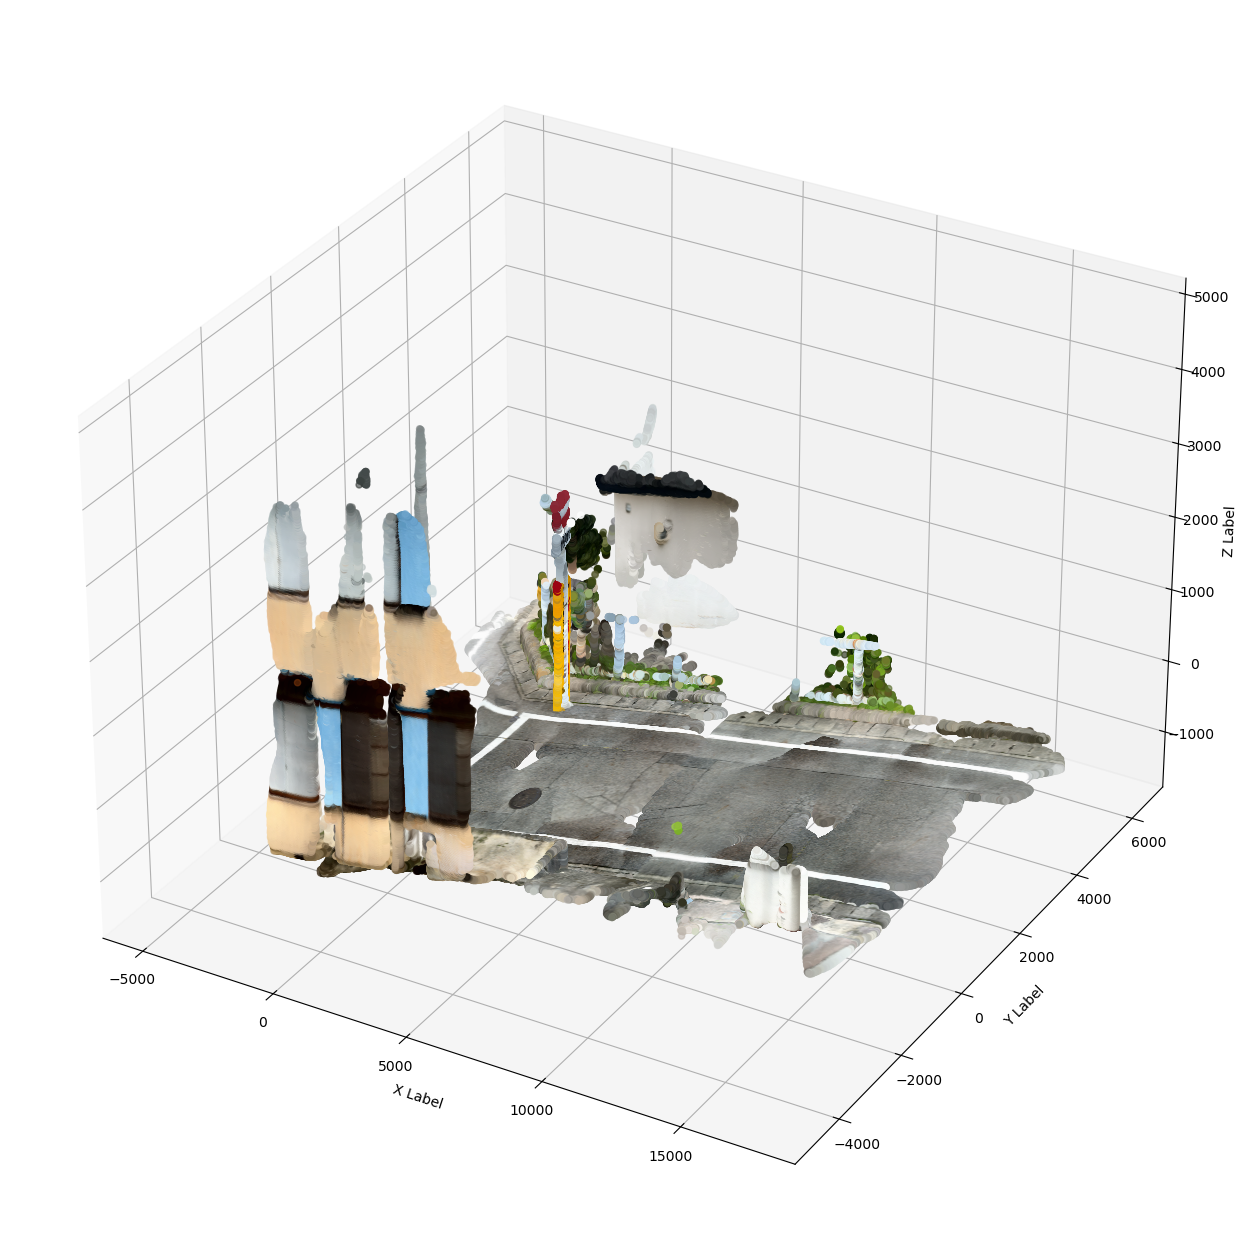

In [7]:
fig = plt.figure(figsize=(18, 16))  # Increase figure size to 18 inches by 16 inches
ax = fig.add_subplot(111, projection='3d')

ax.scatter(points_iphone7[:, 0], points_iphone7[:, 1], points_iphone7[:, 2], c=colors, marker='o', alpha=0.6, edgecolors=colors)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

In [8]:
# Convert to Polars DataFrame
df = pl.DataFrame(points_iphone7)
# Define new column names
new_column_names = ['X', 'Y', 'Z']

# Rename the columns
df = df.rename({old: new for old, new in zip(df.columns, new_column_names)})

# Show the DataFrame with new column names
print(df)

shape: (8_076_963, 3)
┌──────────────┬─────────────┬──────────────┐
│ X            ┆ Y           ┆ Z            │
│ ---          ┆ ---         ┆ ---          │
│ f64          ┆ f64         ┆ f64          │
╞══════════════╪═════════════╪══════════════╡
│ -1033.324341 ┆ 1316.928467 ┆ -1062.460205 │
│ -1022.467957 ┆ 1315.886841 ┆ -1062.168213 │
│ -1011.651611 ┆ 1314.842651 ┆ -1061.86084  │
│ -1001.783142 ┆ 1314.170898 ┆ -1062.302856 │
│ -991.04187   ┆ 1313.12207  ┆ -1061.966797 │
│ …            ┆ …           ┆ …            │
│ 15181.804688 ┆ 4885.897949 ┆ -859.907288  │
│ 15173.189453 ┆ 4878.807129 ┆ -860.837341  │
│ 15163.730469 ┆ 4870.336914 ┆ -860.226929  │
│ 15154.330078 ┆ 4861.895508 ┆ -859.562012  │
│ 15145.426758 ┆ 4854.180176 ┆ -859.599365  │
└──────────────┴─────────────┴──────────────┘


In [9]:
x_min = df['X'].min()
y_min = df['Y'].min()
z_min = df['Z'].min()

x_max = df['X'].max()
y_max = df['Y'].max()
z_max = df['Z'].max()

# Display the minimum value
print("X: ", x_min, " - ", x_max)
print("Y: ", y_min, " - ", y_max)
print("Z: ", z_min, " - ", z_max)

X:  -4915.41162109375  -  17421.35546875
Y:  -4588.701171875  -  6334.77734375
Z:  -1340.43408203125  -  4766.04248046875


/Users/kitt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


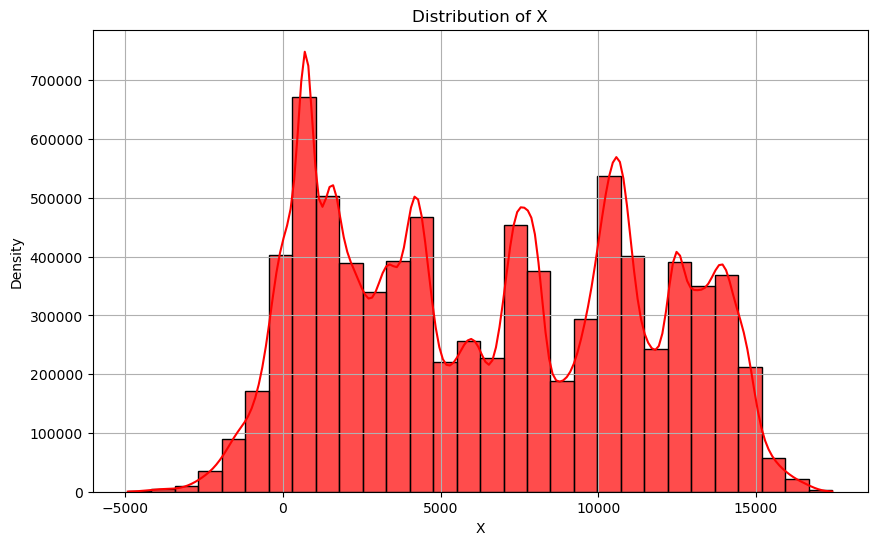

In [10]:
# Plotting the distribution using Seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Histogram with a Kernel Density Estimate (KDE)
sns.histplot(df['X'], kde=True, color='red', bins=30, alpha=0.7, edgecolor='black')

# Alternatively, for just the KDE without the histogram, you can use sns.kdeplot:
# sns.kdeplot(df_pandas['X'], color='blue', shade=True)

plt.title('Distribution of X')
plt.xlabel('X')
plt.ylabel('Density')
plt.grid(True)
plt.show()

/Users/kitt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


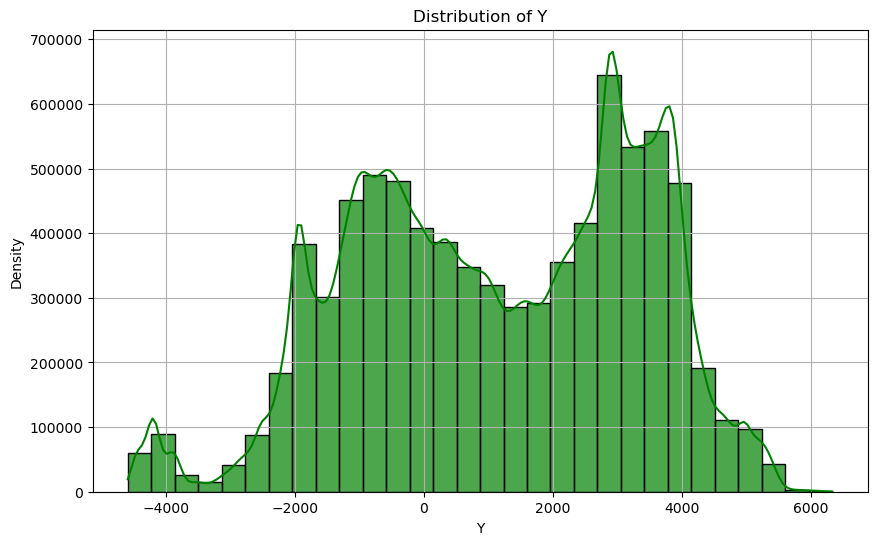

In [11]:
# Plotting the distribution using Seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Histogram with a Kernel Density Estimate (KDE)
sns.histplot(df['Y'], kde=True, color='green', bins=30, alpha=0.7, edgecolor='black')

plt.title('Distribution of Y')
plt.xlabel('Y')
plt.ylabel('Density')
plt.grid(True)
plt.show()

/Users/kitt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


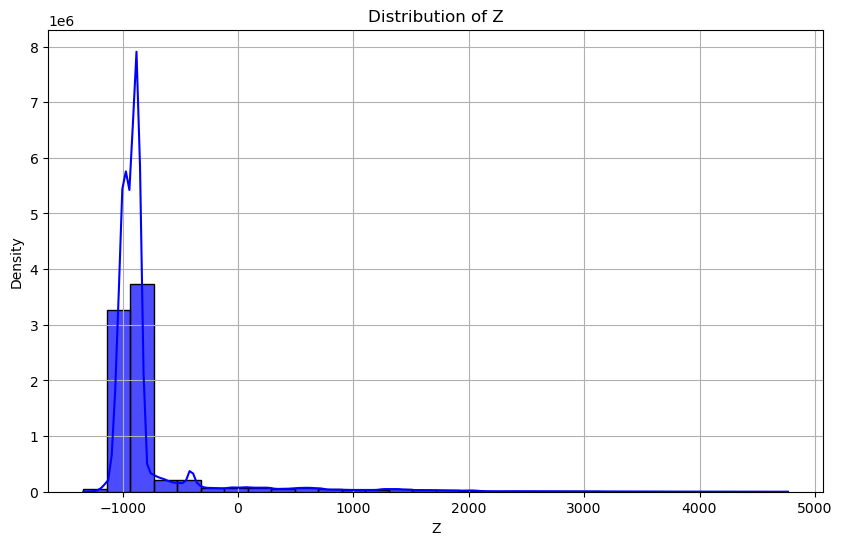

In [12]:
# Plotting the distribution using Seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Histogram with a Kernel Density Estimate (KDE)
sns.histplot(df['Z'], kde=True, color='blue', bins=30, alpha=0.7, edgecolor='black')

plt.title('Distribution of Z')
plt.xlabel('Z')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [13]:
# z = [0:1000]
# x = [:]
# y = [1000:7000]

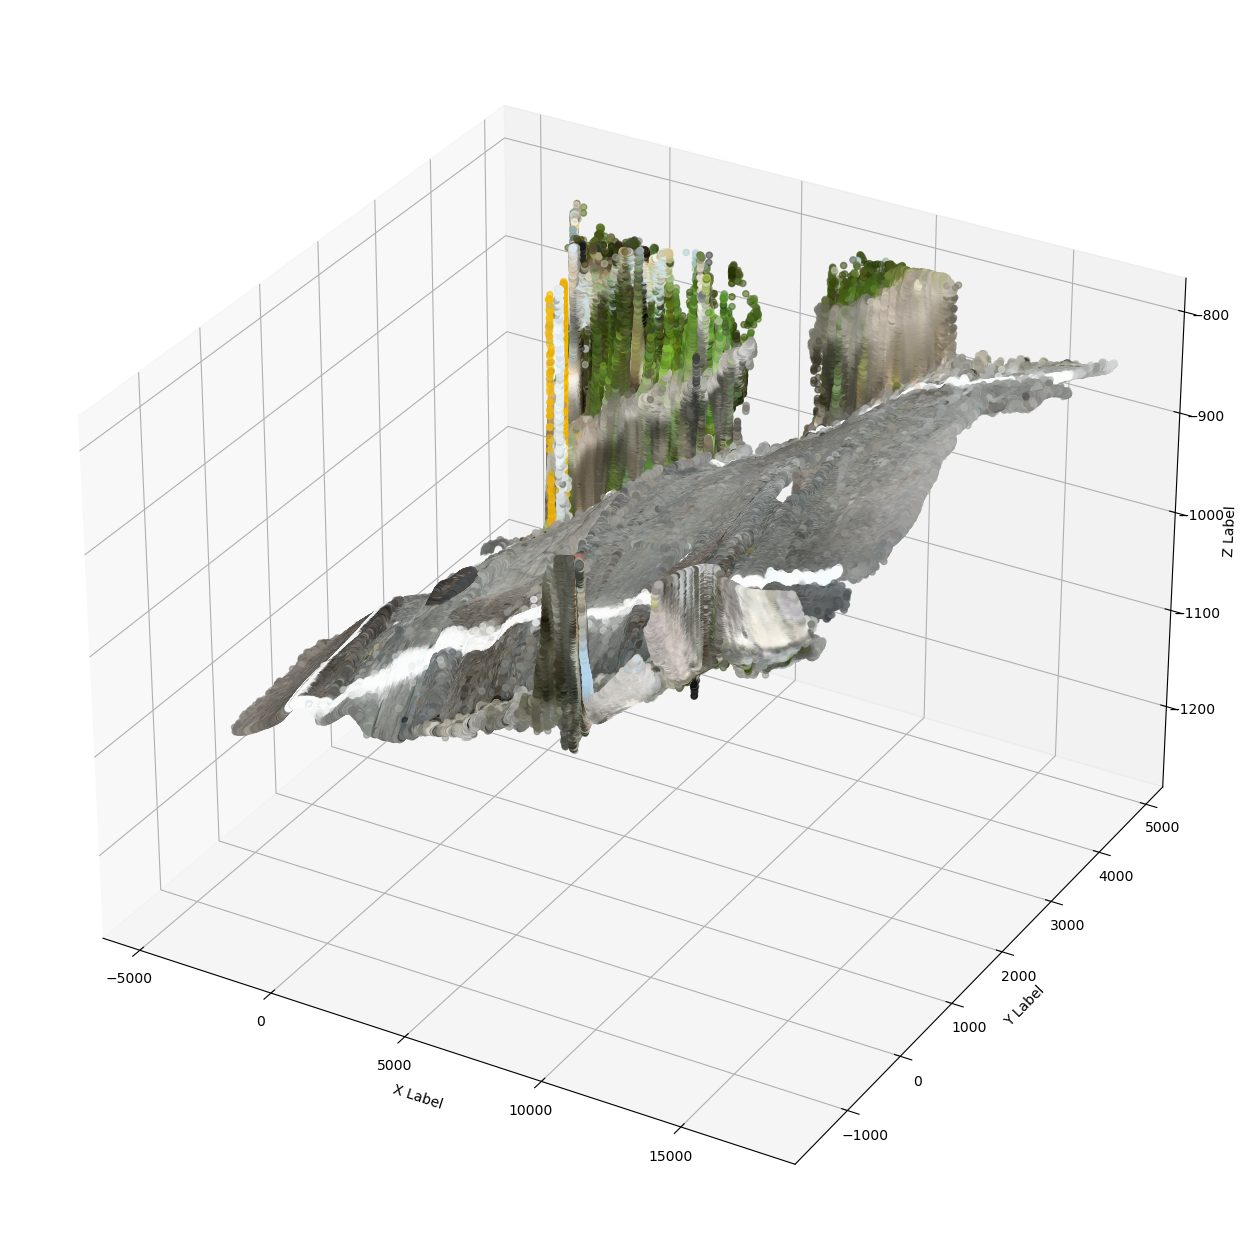

In [14]:
# Define the ranges for cropping
z_min, z_max = -3000, -800
y_min, y_max = -1500, 4900

# Create masks for each condition
mask_z = (points_iphone7[:, 2] >= z_min) & (points_iphone7[:, 2] <= z_max)
mask_y = (points_iphone7[:, 1] >= y_min) & (points_iphone7[:, 1] <= y_max)

# Combine the masks using logical AND operation (you might use OR depending on your requirement)
combined_mask = mask_z & mask_y

# Apply the mask to the points and colors
cropped_points = points_iphone7[combined_mask]
cropped_colors = colors[combined_mask]

# Plotting
fig = plt.figure(figsize=(18, 16))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cropped_points[:, 0], cropped_points[:, 1], cropped_points[:, 2], c=cropped_colors, marker='o', alpha=0.6, edgecolors=cropped_colors)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

# Crop

In [8]:
'''
z_min, z_max = -3000, -800
y_min, y_max = -1500, 4900
'''
min_x, max_x = -4915.41162109375, 17421.35546875
min_y, max_y = -1500, 4900
min_z, max_z = -3000, -800

In [9]:
# Define the bounding box (AABB) for cropping
bbox = o3d.geometry.AxisAlignedBoundingBox(min_bound=(min_x, min_y, min_z),
                                           max_bound=(max_x, max_y, max_z))

In [10]:
# Prepare the data to be saved in JSON format
bbox_data = {
    "min_bound": bbox.min_bound.tolist(), # Convert numpy array to list
    "max_bound": bbox.max_bound.tolist()
}

# Save the bounding box data to a JSON file
with open('bbox_data.json', 'w') as outfile:
    json.dump(bbox_data, outfile)

In [11]:
# Load the bounding box data from the JSON file
with open('bbox_data.json', 'r') as infile:
    loaded_bbox_data = json.load(infile)

# Convert lists back to numpy arrays and create the bounding box
loaded_bbox = o3d.geometry.AxisAlignedBoundingBox(min_bound=loaded_bbox_data["min_bound"],
                                                  max_bound=loaded_bbox_data["max_bound"])

In [12]:
# Crop the point cloud using the loaded bounding box
cropped_pcd = pcd_iphone7.crop(loaded_bbox)

# # Visualize the cropped point cloud (optional)
# o3d.visualization.draw_geometries([cropped_pcd])

In [13]:
# # Crop the point cloud
# cropped_pcd = pcd_iphone7.crop(bbox)

# Save the cropped point cloud to a new .ply file
o3d.io.write_point_cloud("cropped_point_cloud.ply", cropped_pcd)

True

In [ ]:
# Load the cropped point cloud from the saved .ply file
cropped_pcd_loaded = o3d.io.read_point_cloud("cropped_point_cloud.ply")

# Visualize the cropped point cloud
o3d.visualization.draw_geometries([cropped_pcd_loaded])